
# Part 2 - Multiple Hypothesis Testing with the Diabetes Dataset

## Why do we need to care if we do multiple hypothesis testing?

In Part 1, we have explored comparing 2 groups. We were able to say that they are different from each other because the p-value was below the &alpha; cut-off value we set to 0.05. In simple words, the probability of seeing the effect just at random, and not a real effect - *a false positive* or **Type 1** error - is below 5%.

## Multiple hypothesis testing

While doing research, comparing two groups would mean our experiment was quite simple. There is nothing wrong with that, but more often you will test multiple hypotheses at the same time.

For example, you might be:
- Testing the effect of multiple different bactericidal molecules you synthesised on bacterial survival.
- Examining proteomics data trying to determine which ones out of thousands of protein levels are different between different growth conditions.
- Testing whether there is a relationship between reaction yield, and time, temperature and reagent concentration(s).

Basically, you will test multiple hypotheses when examining the same outcome.

While asking these multiple questions, the probability of a false positive result for *each question separately* is equal to the &alpha; you set, usually 0.05.

However, the probability of having *at least one false positive result in the group of questions* is higher. Let's take a deeper look at this potential challenge.


## Type I Error Inflation in Multiple Testing
When you perform multiple hypothesis tests, the probability of making at least one Type I error across all tests increases. This is because each test carries its own chance of error, and the more tests you conduct, the more likely you are to encounter a false positive.

### Overall probability of at least one Type I error
If you perform *m* tests, the overall probability of making at least one Type I error is given by:

$$P(\text{at least one Type I error}) = 1 - (1 - \alpha)^m$$

where *m* is the number of tests and &alpha; is the significance level.

**Example**: For 10 tests at $\alpha = 0.05$:

$$P(\text{at least one Type I error}) = 1 - (1 - 0.05)^{10} \approx 0.401$$

This means there's about a 40% chance of making at least one false positive when conducting 10 tests with a significance level of 0.05.

The code below generates a plot showing the probability of at least Type I error depending on the number of hypotheses tested at the same time.

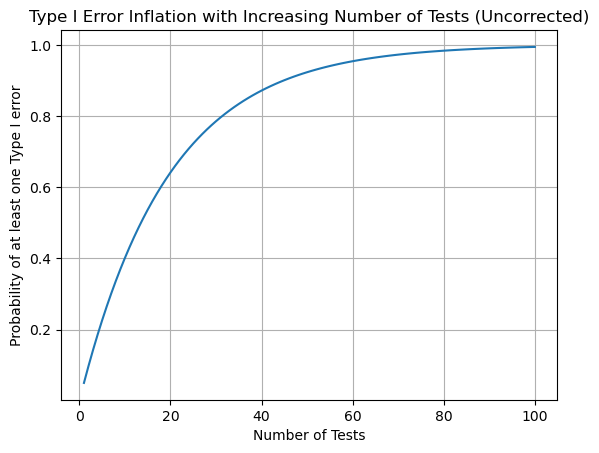

In [3]:
from pylab import *

# Parameters
alpha = 0.05  # Significance level (Type I error rate for individual tests)
max_tests = 100  # Maximum number of tests to simulate

def probability_at_least_one_error(n_tests, alpha):
    '''Probability of at leat one Type I error
    when performing n_tests with alpha error rate'''
    return 1 - (1 - alpha)**n_tests

n_tests_array = arange(1, max_tests + 1)

# Plot uncorrected Type I error inflation
plot(n_tests_array,probability_at_least_one_error(n_tests_array, alpha))
plt.title("Type I Error Inflation with Increasing Number of Tests (Uncorrected)")
plt.xlabel("Number of Tests")
plt.ylabel("Probability of at least one Type I error")
plt.grid(True)
plt.show()

From this plot, you can appreciate that this probability can become quite high - almost a certainty. Fortunately, statisticians invented ways of dealing with this challenge, and minimizing the risk of false positives. We will discuss two of them.

### Bonferroni Correction
The **Bonferroni correction** adjusts the significance level to control the overall probability of making Type I errors when performing multiple tests. It divides the significance level by the number of tests to create a stricter threshold for each individual test.

For *m* tests, the new significance level becomes:
$$\alpha_{\text{corrected}} = \frac{\alpha}{m}$$

**Example**: If you conduct 10 tests at $\alpha = 0.05$, the Bonferroni correction adjusts the threshold for each test to $\alpha_{\text{corrected}} = 0.05 / 10 = 0.005$. This reduces the chance of making a Type I error in any given test and controls the overall error rate across all tests.

### False Discovery Rate (FDR) Correction
The **False Discovery Rate (FDR)** correction provides a more flexible approach to controlling errors in multiple testing scenarios. Instead of controlling the probability of making any false positives (like the Bonferroni correction), FDR controls the expected proportion of false positives among the rejected hypotheses. This is particularly useful when conducting a large number of tests and where some false positives are tolerable, as long as their rate is controlled.

The FDR is commonly controlled using the **Benjamini-Hochberg procedure**, although it is not the only procedure available. The steps for this procedure are as follows:

1. Rank all *p*-values in ascending order: *p<sub>1</sub>, p<sub>2</sub>, ... , p<sub>m</sub>* where *m* is the number of tests.
2. For a chosen FDR level *q*, find the largest *k* such that:
$$p_k \leq \frac{k}{m} \cdot q$$
3. Reject all hypotheses with *p*-values less than or equal to *p<sub>k</sub>*.

**Example**: If you perform 10 tests and choose an FDR level of $ q = 0.05 $, you rank the *p*-values and apply the above formula to determine the threshold for rejecting null hypotheses while controlling the FDR at 5%. This allows you to reject some hypotheses while ensuring that the proportion of false positives among them remains low.

FDR correction is generally less conservative than Bonferroni, making it more powerful in situations where multiple comparisons are being made and some false positives are acceptable.


### When to Use Bonferroni vs. FDR:

When to Use Bonferroni:

1. Small Number of Hypotheses: Bonferroni is suitable when you’re conducting only a small number of hypothesis tests (e.g., fewer than 10). In these cases, the conservativeness of Bonferroni is less of a burden, and it ensures a low risk of false positives.
2. Strong Control of Type I Errors: If you need to be extremely cautious about making false positives (e.g., in clinical trials or regulatory decision-making), Bonferroni is ideal. The focus is on ensuring that no false positives slip through, even if it means missing some true effects (i.e., increasing Type II errors).
3. Confirmatory Research: When you’re in the phase of testing well-established hypotheses, where the cost of a false positive is high, Bonferroni is preferred. For example, in medical research, where a false conclusion about a drug’s efficacy could have serious consequences, Bonferroni offers a stringent level of control.

When to Use FDR (False Discovery Rate):

1. Large Number of Hypotheses: FDR is better suited when dealing with a large number of hypotheses, such as in genomic studies, social science research, or exploratory analyses with many comparisons. In such cases, Bonferroni might be too conservative and lead to many false negatives, missing potentially important discoveries.
2. Exploratory Research: If you’re exploring many possible relationships, and your goal is to identify several potential leads while tolerating a certain proportion of false positives (e.g., identifying genes related to a disease), FDR is more appropriate. It balances discovering true effects with controlling the rate of false positives.
3. When Some False Positives Are Acceptable: In situations where false positives are less critical, and you’re willing to tolerate some in exchange for identifying more true positives, FDR is a more practical choice. This is often the case in preliminary research or in fields where follow-up studies can later validate the findings.


## Diabetes Dataset Overview

This notebook uses a subset of the **Diabetes dataset** to demonstrate multiple hypothesis testing. We will test several hypotheses about clinical measurements such as glucose levels, body mass index, and age, and then apply corrections to control for Type I errors. This dataset is often referred to as the Pima Indians Diabetes Database, as it originates from a study of diabetes among Pima Indian women in the United States.

The “diabetes” dataset is commonly used in machine learning and statistical modeling for binary classification tasks, particularly for predicting the onset of diabetes. It is publicly available and often used for educational purposes or testing models. Below is a general description of the dataset:

Key Variables (Features):

1. Pregnancies: Number of times the patient has been pregnant.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)<sup>2</sup>).
7. DiabetesPedigreeFunction: A function which scores the likelihood of diabetes based on family history (pedigree).
8. Age: Age of the patient (years).
9. Outcome: Binary variable (0 or 1) indicating whether the patient has diabetes (1 = Yes, 0 = No).


## Hypothesis Testing and Errors
In this analysis, we will try to see which variables significantly different between the diabetic and non-diabetic patients.
Why would we do that? Each variable for which we see a significant difference could, for example, become an easy metric to monitor by doctors and be used to decide whether to send a patient for a diagnostic test to determine their diabetes status.

However, if the significant difference we reveal for a variable is due to a *Type I* error (false positive), this variable would not be a good metric to be monitored.
Therefore, we need to make sure we do not have any false positives. We'll apply both Bonferroni and False Discovery Rate (FDR) corrections to account for multiple testing and reduce Type I errors.

## Data Analysis of the diabetes dataset

We want to test various hypotheses about how these measurements differ between diabetic and non-diabetic individuals. We will be using the multiple test functionality from the [statsmodels](https://www.statsmodels.org/) module

In [30]:
import pandas 
import scipy.stats
import statsmodels.stats.multitest

Loading and initial processing of data:

In [24]:
# Load the dataset
data = pandas.read_csv('diabetes.csv')

# Replace 0 with NaN for relevant columns (we assume that 0 is invalid for certain variables)
# We don't consider 0 as valid for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Remove incomplete data rows
data = data.dropna()

# Separate the data by the Outcome column
diabetes_0 = data[data['Outcome'] == 0]  # No diabetes group
diabetes_1 = data[data['Outcome'] == 1]  # Diabetes group

# List of variables to plot (excluding the column, 'Outcome')
variables = data.columns[:-1]

diabetes_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
25,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1
31,3,158.0,76.0,36.0,245.0,31.6,0.851,28,1


### Data visualisation

As a first step of data analysis, let's visualise it.

Plot histograms for each variable, grouped by Outcome

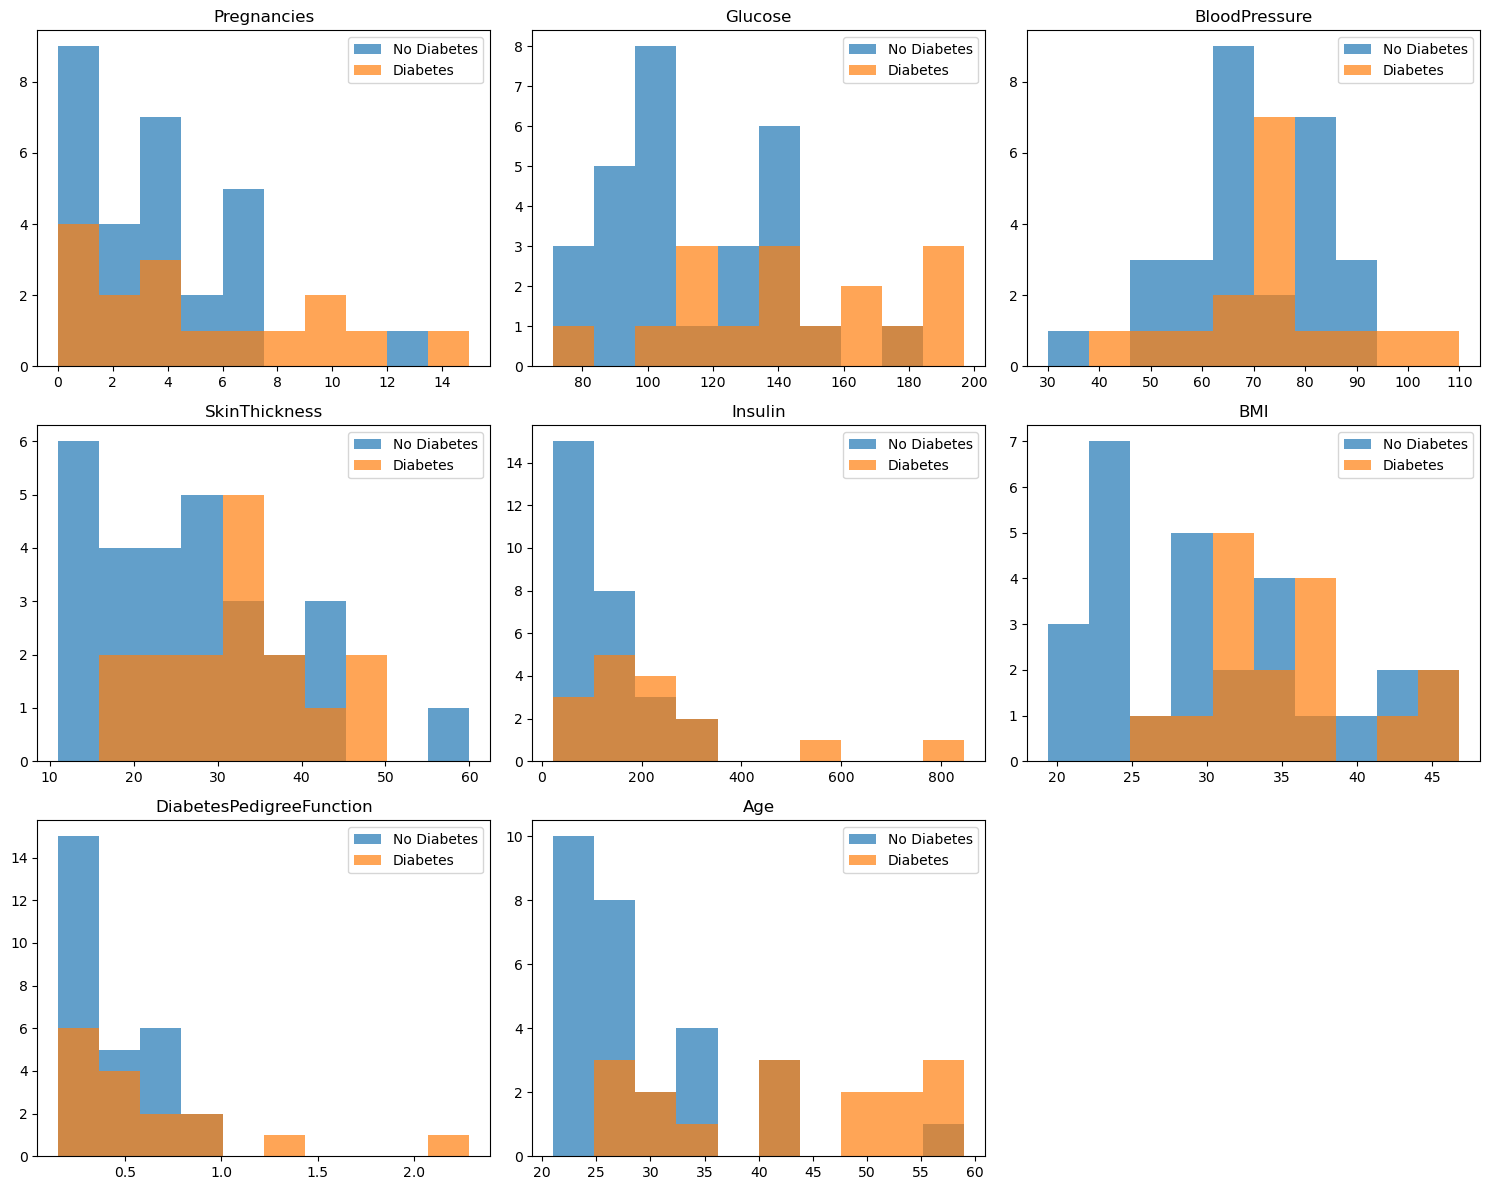

In [28]:
figure(figsize=(15, 12))  # Create a figure for multiple subplots
for i, var in enumerate(variables):
    subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    hrange=(min(diabetes_0[var].min(),diabetes_1[var].min()),max(diabetes_0[var].max(),diabetes_1[var].max())) #create the same range for both groups
    diabetes_0[var].hist(bins=10,alpha=0.7,range=hrange,grid=False,label='No Diabetes')  # Plot histogram for no diabetes
    diabetes_1[var].hist(bins=10,alpha=0.7,range=hrange,grid=False,label='Diabetes')  # Plot histogram for diabetes
    title(var)  # Set the title to the variable name
    legend()  # Add a legend to distinguish the groups

# Display the plots
tight_layout()  # Adjust layout to prevent overlap
show()

We can see that for all variables the distributions for people with and without diabetes *look* different. We now want to investigate if the differences are statistically significant.

### Testing if the data is nomally distributed

We want first to check if the data is normally/gaussian distributed, because that will determine if we can use the t-test or not. Some of the histograms above look normally distributed, others less so, but we should use the Shapiro-Wilk test to verify.

In [20]:
diabetes_0[variables].apply(scipy.stats.shapiro).iloc[1]

Pregnancies                 0.002382
Glucose                     0.068129
BloodPressure               0.130858
SkinThickness               0.112857
Insulin                     0.005142
BMI                         0.104458
DiabetesPedigreeFunction    0.006678
Age                         0.000245
Name: 1, dtype: float64

The p-value is lower than 0.05 for variables: Pregnancies, Insulin, DiabetesPedigreeFunction, Age, so we reject the null hypothesis for these variables, and infer that the distributions are not normal for these variables.

How about individuals with diabetes?

In [9]:
diabetes_1[variables].apply(scipy.stats.shapiro).iloc[1]

Pregnancies                 0.136721
Glucose                     0.773246
BloodPressure               0.397346
SkinThickness               0.456876
Insulin                     0.000387
BMI                         0.260623
DiabetesPedigreeFunction    0.001088
Age                         0.077123
Name: 1, dtype: float64

The p-value is lower than 0.05 for variables: Insulin, DiabetesPedigreeFunction, so we reject the null hypothesis for these variables, and infer that the distributions are not normal for these variables.

As some of variables are not distributed normally, we cannot use the t-test, and will use Mann-Whitney U test. Therefore, we do not need to check for equality of variance between pairs of variables.

### Hypotheses for Variables in the Diabetes Dataset

1. Pregnancies:
   - H<sub>0</sub>: The distribution of number of pregnancies is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of number of pregnancies is different for people with and without diabetes.

2. Glucose:
   - H<sub>0</sub>: The distribution of glucose levels are the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of glucose levels are different for people with and without diabetes.

3. BloodPressure:
   - H<sub>0</sub>: The distribution of blood pressure is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of blood pressure is different for people with and without diabetes.

4. SkinThickness:
   - H<sub>0</sub>: The distribution of skin thickness is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of skin thickness is different for people with and without diabetes.

5. Insulin:
   - H<sub>0</sub>: The distribution of insulin levels are the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of insulin levels are different for people with and without diabetes.

6. BMI:
   - H<sub>0</sub>: The distribution of BMI is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of BMI is different for people with and without diabetes.

7. DiabetesPedigreeFunction:
   - H<sub>0</sub>: The distribution of diabetes pedigree function is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of diabetes pedigree function is different for people with and without diabetes.

8. Age:
   - H<sub>0</sub>: The distribution of age is the same for people with and without diabetes.
   - H<sub>A</sub>: The distribution of age is different for people with and without diabetes.
   
We will first apply the Mann-Whitney U testto all variables, and make a list of the p-values of each test.

In [38]:
p_values = []

# Perform Mann-Whitney U test for each variable
for var in variables:
    _, p_value = scipy.stats.mannwhitneyu(diabetes_0[var], diabetes_1[var])
    p_values.append(p_value)

p_values

[0.3253347003048721,
 0.007001365549712949,
 0.3655977484376083,
 0.06529312662111708,
 0.0021939237063235643,
 0.0327727224714745,
 0.5998857806400251,
 0.0001839668044481742]

We will now create a list of corrected p-values according to the Bonferroni and FDR criteria

In [40]:
# Bonferroni correction
bonferroni_corrected = statsmodels.stats.multitest.multipletests(p_values, alpha=0.05, method='bonferroni')[1]

# FDR correction (Benjamini-Hochberg)
fdr_corrected = statsmodels.stats.multitest.multipletests(p_values, alpha=0.05, method='fdr_bh')[1]

Now print a table with all values in a nice format

In [41]:
print(f'{"Variable":<26} {"p-value":<14} {"Bonferroni":<15} {"FDR":<14}')
for i in range(len(variables)):
    print(f'{variables[i]:<26} {p_values[i]:<14.8f} {bonferroni_corrected[i]:<15.8f} {fdr_corrected[i]:<14.8f}')

Variable                   p-value        Bonferroni      FDR           
Pregnancies                0.32533470     1.00000000      0.41782600    
Glucose                    0.00700137     0.05601092      0.01867031    
BloodPressure              0.36559775     1.00000000      0.41782600    
SkinThickness              0.06529313     0.52234501      0.10446900    
Insulin                    0.00219392     0.01755139      0.00877569    
BMI                        0.03277272     0.26218178      0.06554544    
DiabetesPedigreeFunction   0.59988578     1.00000000      0.59988578    
Age                        0.00018397     0.00147173      0.00147173    


By carefully looking at the table, we can see that:
- The p-value for the comparison of glucose levels between the diabetic and non-diabetic populations increases over the 0.05 treshold after the Bonferroni correction, but not FDR correction
-  The p-value for the comparison of BMI between the diabetic and non-diabetic populations p-value increases over the 0.05 treshold after the Bonferroni correction, and the FDR correction.

We can also visualise these results:

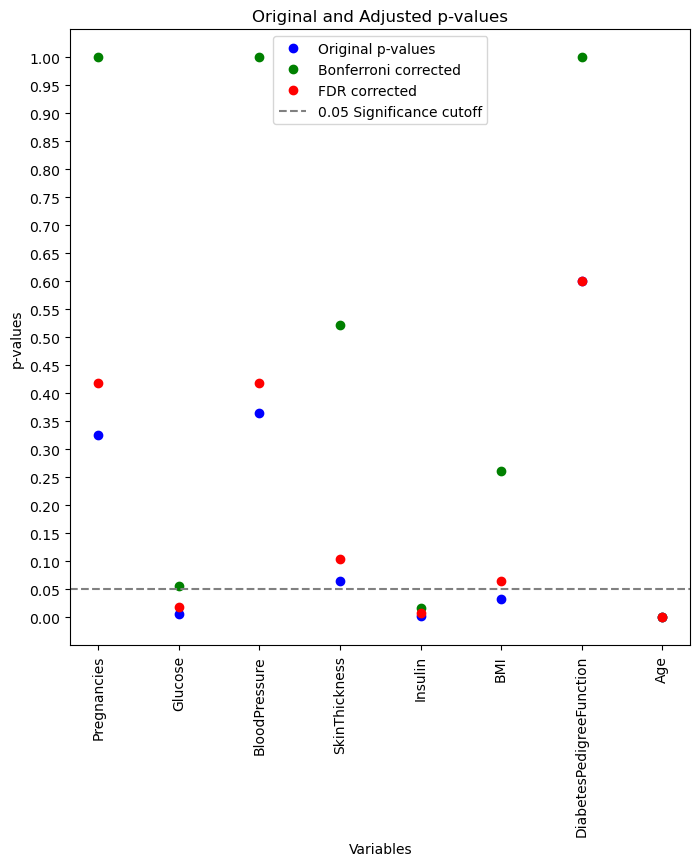

In [51]:
figure(figsize=(8, 8))

plot(p_values, color='blue',linestyle='',marker='o',label='Original p-values')
plot(bonferroni_corrected, color='green',linestyle='',marker='o',label='Bonferroni corrected')
plot(fdr_corrected, color='red',linestyle='',marker='o',label='FDR corrected')

# Draw the significance cutoff at p = 0.05
axhline(y=0.05, color='gray', linestyle='--', label='0.05 Significance cutoff')

xlabel('Variables')
ylabel('p-values')
title('Original and Adjusted p-values')
legend(loc='upper center')
xticks(arange(len(variables)),variables,rotation=90)
yticks(arange(0, 1.05, 0.05))  # Set x-axis ticks every 0.05
show()

### Conclusion

Based on the statistical tests performed using the **Mann-Whitney U test**, we found significant differences in the distributions between people with and without diabetes for some of the variables considered. However, because we know about the increase of the probability of type I errors (false positives) as the number of tests increase, i.e. the possibility that for at least one test we wrongly reject the null hypothesis and conclude that a given variable presents a different mean for diabetic and healthy people, we applied a correction to our p-value.

<span style='color:red'>We do not want to not diagnose people who potentially have diabetes. We decide to use the FDR-corrected results - which are less strict.</span>

Using the FDR-corrected results, we conclude:

1. **Glucose**: The distribution of glucose levels is significantly different between people with and without diabetes.

2. **Insulin**: The distribution of insulin levels is significantly different between people with and without diabetes.

3. **Age**: The distribution of age is significantly different between people with and without diabetes.

For all other variables considered in this analysis we could not find a significant difference. That does not mean the difference does not exist - perhaps it is just that our data is not sufficient to show it.

### Practice - Analysis of the full diabetes dataset

In the study we conducted above, we concluded that for several variables the corrected p-values were not sufficiently low to reject the null hypothesis, and we could not conclude that there is a significant difference between the groups with diabetes and without diabetes in spite of some apparent differences in the histograms. However, with more data, it may be possible to show that such differences are actually statistically significant.

The dataset explored above was just a subset of the full diabetes dataset. You can use the full dataset in the *diabetes_full.csv* file, to investigate if using more data you are able to prove that other variables show significant differences between diabetic and non-diabetic populations, and thus may be used to aid in diagnostic.